### Student Information
Name:吳花瑜

Student ID:114065534

GitHub ID:huayu1115

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [65]:
### import 所需套件
import math
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

In [66]:
# 導入資料集
df = pd.read_csv('newdataset\Reddit-stock-sentiment.csv')
# 嘗試印出
print(df.iloc[0:2, 0:4])

      type             datetime  post_id       subreddit
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets


In [67]:
# 查看資料長度
print(len(df))

847


In [68]:
# 列出所有欄位名稱
print(df.columns.tolist())

['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


### **>>> Exercise 1:**  印出前三筆資料的 text 欄位

In [69]:
# print out the *text* data for the first three samples in the dataset
for i in range(3):
    print(f'example {i+1}')
    print(df.text[i])

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


### **>>> Exercise 2:**  其他查詢技巧


In [70]:
# Experiment with other querying techniques
df[:16:3][['title','author','type']]

,title,author,type
0,Retardation is on the menu boys! WSB is so back,StickyTip420,comment
3,Who knows more? $VMAR,emiljenfn,post
6,Is the market in complete denial right now?,stoniey84,comment
9,Any cheap stocks under $10?,Zumuru,comment
12,U.S. 10-year Treasury yields rise as Trump tar...,JBallMan23,comment
15,"It's fucking awful seeing the ""Silver"" misinfo...",nerokaeclone,comment


### **>>> Exercise 3:**  條件查詢後取前五筆資料


In [71]:
# fetch records (type == post), and query every 10th record. Only show the first 5 records.
df[df['type'] == 'post'][::10][:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
165,post,2025-04-09 14:01:01,1jv6i3y,stockstobuytoday,Established Uptrend,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,"['SMA', 'ta_rsi_nob60', 'ft=2', 'stockbuyvest....",0.0
332,post,2025-04-11 18:25:25,1jwwv42,wallstreetbets,$75k+ In Gains (300% YTD),KatBoss01,https://www.reddit.com/gallery/1jwwv42,5,0.0,1.00,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,"['GBTC', 'MSTR', 'AAPL']",1.0
421,post,2025-03-31 14:05:30,1jo3zpc,stockstobuytoday,Stock Gainers for Today,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,"[']', 'Popping', 'stockbuyvest.com', 'today']",0.0
487,post,2021-12-25 0:40:59,rnypxo,stockstobuytoday,Deep value vs Dividend!,AnonymusFarmer,https://www.reddit.com/r/stockstobuytoday/comm...,9,0.0,0.91,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,"['student', 'someone', 'x200B', 'dividend', 'w...",0.0


### **>>> Exercise 4:**  Row 的缺失資料總和


In [72]:
# calculate the missing values in every record instead of every column
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### **>>> Exercise 5:**  explain why `.isnull()` didn't work (Can skip)


### **>>> Exercise 6:**  對資料集抽樣


In [73]:
# Sampling
df_sample = df.sample(n=500)
df_sample.sort_index()[:3]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### **>>> Exercise 7:**  樣本中各個 label 的數目，並畫出長條圖


label
 0.0    240
-1.0    194
 1.0     66
Name: count, dtype: int64


<Axes: title={'center': 'Label distribution'}, xlabel='label_str'>

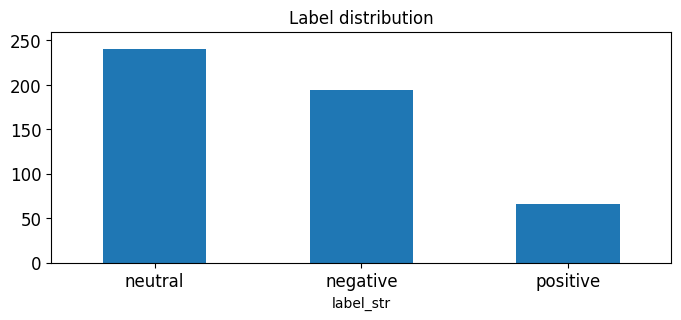

In [74]:
# 建立 label 的對應關係
label_map = {
    1: 'positive',
    0: 'neutral',
    -1: 'negative'
}
df_sample['label_str'] = df_sample['label'].map(label_map)

# 計算各 label 的數量
print(df_sample.label.value_counts())

# 畫圖
df_sample.label_str.value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, df_sample.label_str.value_counts().max()+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 8:**  將整個資料集和抽樣的分布畫在一張長條圖上


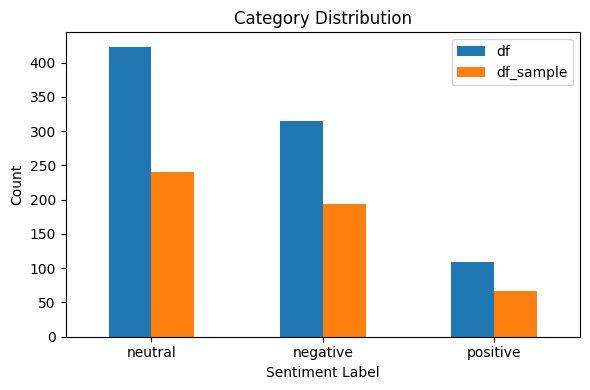

In [75]:
# 分別計算數量
df_counts = df['label'].value_counts()
df_sample_counts = df_sample['label'].value_counts()

# 利用 union 合併兩個集合，若有沒有的類別則補 0
categories = sorted(set(df_counts.index).union(set(df_sample_counts.index)))
df_counts = df_counts.reindex(categories, fill_value=0)
df_sample_counts = df_sample_counts.reindex(categories, fill_value=0)

# 轉換成 DataFrame
compare = pd.DataFrame({
    'df': df_counts,
    'df_sample': df_sample_counts
})

# 以總和排序
compare['total'] = compare['df'] + compare['df_sample']
compare = compare.sort_values(by='total', ascending=False)

# 對應 label 和 positive, neutral, negative
compare.index = compare.index.map(label_map)

# 畫圖（只畫 df 和 df_sample)
compare[['df', 'df_sample']].plot(kind='bar',
                                  figsize=(6, 4),
                                  rot=0,
                                  title='Category Distribution')

plt.ylabel('Count')
plt.xlabel('Sentiment Label')
plt.tight_layout()
plt.show()

### **>>> Exercise 9:**  建立 document-term matrix，並對第一筆資料測試


In [76]:
# 計算 df.text 的 document-term matrix
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

# 原本 document 1 的 text
print("第一筆資料的 text 是: ", df.loc[0,'text'])
print('\n')

# document1 的計算結果
print("fit transform 結果是:")
print(df_counts[0])
print('\n')

# document1 對應的 token
print("使用get_feature_names_out():")
print(count_vect.get_feature_names_out()[692])
print(count_vect.get_feature_names_out()[2706])
print(count_vect.get_feature_names_out()[3248])
print('\n')

# 或使用 analyzer()
print("使用 analyzer():")
analyze = count_vect.build_analyzer()
print(analyze(df.text[0]))

第一筆資料的 text 是:  Calls on retards


fit transform 結果是:
  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


使用get_feature_names_out():
calls
on
retards


使用 analyzer():
['calls', 'on', 'retards']


### **>>> Exercise 10:**  找出 document-term matrix 非零值的 index，並印出對應的詞


In [77]:
# 畫出前四筆資料的部分 document-term matrix
df_counts[0:4, 130:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0]])

In [78]:
# 第四筆資料有多個非零值，找出它們
arr = df_counts[3, 130:200].toarray()  # index start from 130
row_idx, col_idx = np.where(arr >= 1)
print("nonzero index: ", col_idx)

for i in col_idx:
    print(count_vect.get_feature_names_out()[i+130]) # we need to add 130 

nonzero index:  [45 65 66 67]
about
achieved
achievement
achieves


### **>>> Exercise 11:**  降低矩陣稀疏度，並畫出 heatmap


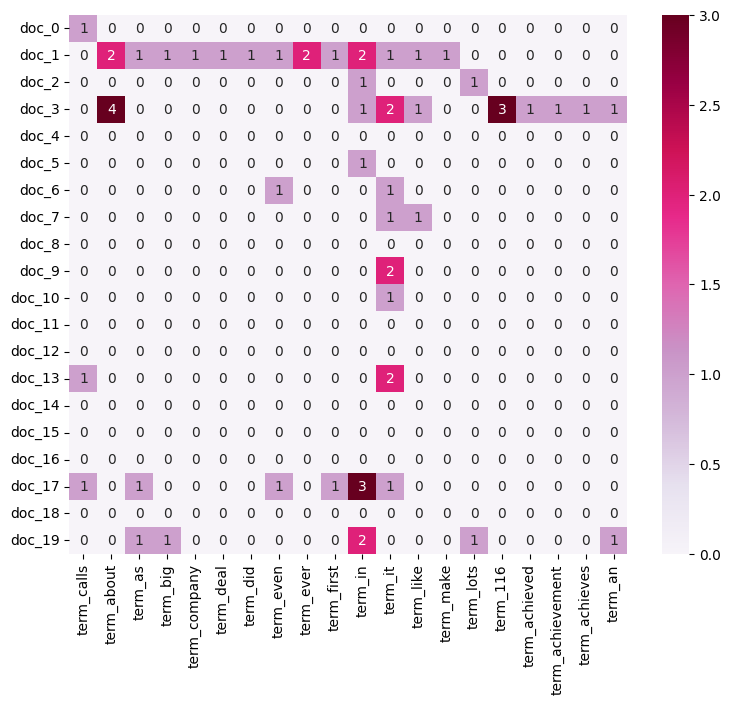

In [79]:
# 找出非零的行、列索引
arr = df_counts[0:20, 0:2500].toarray()  
row_idx, col_idx = np.where(arr > 0)

# 移除重複並保留順序，保留前 20 個
unique_col_idx = list(dict.fromkeys(col_idx))
unique_col_idx = unique_col_idx[:20]

# 設定 x 軸 y 軸
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[list(unique_col_idx)]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
# heatmap 中的值
plot_z = df_counts[0:20, list(unique_col_idx)].toarray()

# 打包成 dataframe
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# 畫圖
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)

### **>>> Exercise 12:**  利用 plotly 畫圖


In [80]:
# 計算在所有文件中前20個字的頻率
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# 打包成 dataframe
term_df = pd.DataFrame({
    'word': count_vect.get_feature_names_out()[:300],
    'frequency': term_frequencies[:300]
})

# 畫圖
fig = px.bar(term_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> Exercise 13:**  有效地減少想要視覺化的詞彙數量


In [81]:
# 找出所有文本單字出現頻率最高的 30 個單字

# 把單字和頻率打包成 dataframe
term_df = pd.DataFrame({
    'word': count_vect.get_feature_names_out()[:],
    'frequency': term_frequencies[:]
})

# 按照頻率降序排序，並取出前 30 個
sort_df = term_df.sort_values(by='frequency', ascending=False).head(30)

# 用 plotly.express 
fig = px.bar(sort_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> Exercise 14:**  依照詞彙頻率排序，畫出長尾圖


In [82]:
# 依照詞彙出現數量排序，取前400
sort_df = term_df.sort_values(by='frequency', ascending=False).head(400)

# 畫圖
fig = px.bar(sort_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> Exercise 15:**  畫出對數分布圖

In [83]:
'''
說明:
對數分布，可以讓資料的變化更平滑、更容易比較出現頻率特別少和特別多的資料。
'''
# 將詞彙頻率轉換成 log 頻率
term_frequencies_log = [math.log(i) for i in term_frequencies]

# 把單字和 log 頻率打包成 dataframe
df = pd.DataFrame({
    'word': count_vect.get_feature_names_out()[:],
    'frequency': term_frequencies_log[:]
})

# 按照頻率降序排序
sort_df = df.sort_values(by='frequency', ascending=False).head(400)

# 畫圖
fig = px.bar(sort_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> 嘗試新的資料視覺化技巧:** 

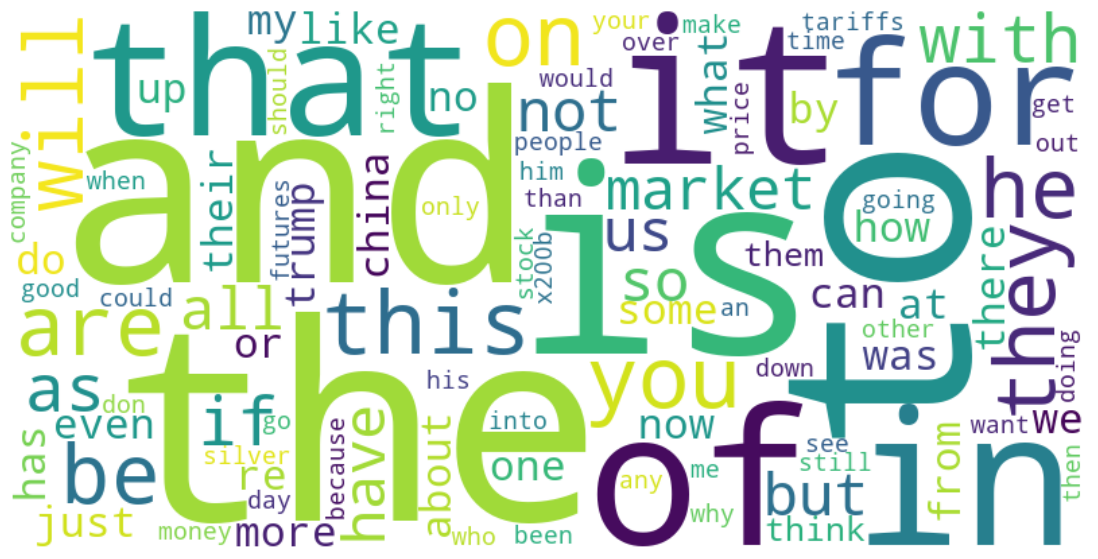

In [84]:
# Generate meaningful new data visualizations: wordcloud
from wordcloud import WordCloud

df_text = sort_df[:100]

# 建立詞頻字典 {word: frequency}
word_freq_dict = dict(zip(df_text['word'], df_text['frequency']))

# 建立文字雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# 顯示文字雲
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

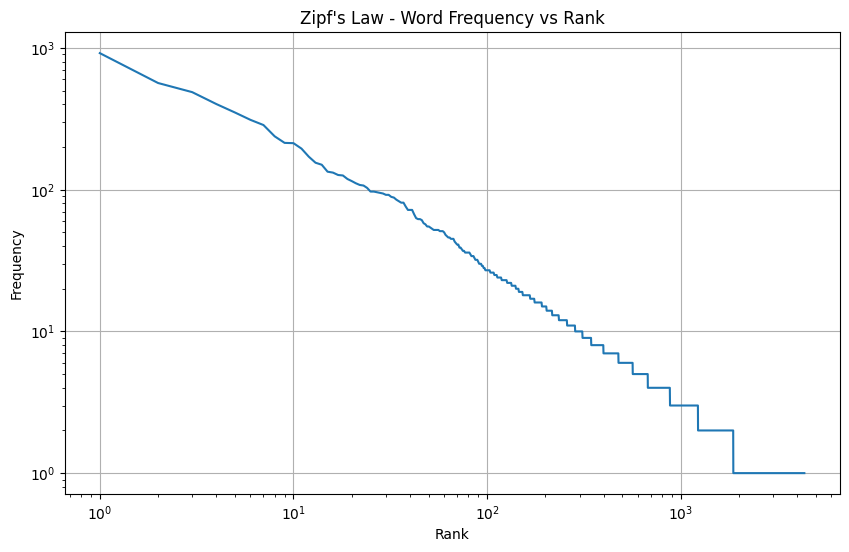

In [86]:
# Zipf's law : 一個單詞出現的頻率與它在頻率表裡的排名成反比
freqs = pd.Series(term_frequencies).sort_values(ascending=False)
ranks = np.arange(1, len(freqs)+1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, freqs.values)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law - Word Frequency vs Rank")
plt.grid(True)
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here